# Discourse Marker Plots

## Reading-in and processing the Data

In [1]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
import ast
import json

%matplotlib inline

class CorpusData:
    def __init__(self, spotify_scores, spotify_dict, ted_scores, ted_dict,
                 ny_scores, ny_dict, gig_scores, gig_dict):
        self.spotify_data = pd.read_csv(spotify_scores)
        with open(spotify_dict, 'r', encoding='utf-8') as sp_json:
            self.spotify_marker = json.load(sp_json)
        self.ted_data = pd.read_csv(ted_scores)
        with open(ted_dict, 'r', encoding='utf-8') as td_json:
            self.ted_marker = json.load(td_json)
        self.ny_data = pd.read_csv(ny_scores)
        with open(ny_dict, 'r', encoding='utf-8') as ny_json:
            self.ny_marker = json.load(ny_json)
        self.gig_data = pd.read_csv(gig_scores)
        with open(gig_dict, 'r', encoding='utf-8') as gig_json:
            self.gig_marker = json.load(gig_json)


In [2]:
data = CorpusData("../bigData/listenability-tools/scores/spotify-scores_short.csv",
                  "../bigData/listenability-tools/dict/spotify-dict.json",
                  "../bigData/listenability-tools/scores/ted-scores_short.csv",
                  "../bigData/listenability-tools/dict/ted-dict.json",
                  "../bigData/listenability-tools/scores/nytimes-scores_short.csv",
                  "../bigData/listenability-tools/dict/nytimes-dict.json",
                  "../bigData/listenability-tools/scores/example-scores_short.csv",
                  "../bigData/listenability-tools/dict/gigaword-dict.json")

## Plotting the data

### Piechart

In [3]:
def draw_piechart(title, slices, labels, colors, angle):
    """
    Draws a Piechart of the given data with a title and labels for the slices
    """
    plt.pie(slices, labels=labels, colors=colors,
            startangle=angle, autopct='%1.1f%%')

    plt.title(title)
    plt.tight_layout()
    plt.show()

### Barchart

In [4]:
def draw_barchart(title, x, y_1, y_1_label,
                  y_2=None, y_2_label=None, y_3=None, y_3_label=None, y_4=None, y_4_label=None,
                  width=0.15, style='fivethirtyeight',
                  color_1='k', color_2='k', color_3='k', color_4='k',
                  x_label=None, y_label=None, x_ticks=None, y_ticks=None):
    """
    Draws a Barchart of the given Data
    :param title: the title of the plot
    :param x: the array of x values
    :param y_1: the array of the first set of y values
    :param y_1_label: the label of the first dataset
    :param y_2: the array of the second set of y values
    :param y_2_label: the label of the second dataset
    :param y_3: the array of the third set of y values
    :param y_3_label: the label of the third dataset
    :param y_4: the array of the fourth set of y values
    :param y_4_label: the label of the fourth dataset
    :param width: the width of the bars
    :param style: the style that should be used in the plot
    :param color_1: color for the first set of data
    :param color_2: color for the second set of data
    :param color_3: color for the third set of data
    :param color_4: color for the fourth set of data
    :param x_label: the label for the x-axis
    :param y_label: the label for the y-axis
    :param x_ticks: array of [[x-ticks], [labels for those ticks]]
    :param y_ticks: array of [[y-ticks], [labels for those ticks]]
    :return: nothing
    """

    plt.style.use(style)

    '''For multiple sets of data the bars need to be set a bit appart, otherwise they would overlap'''
    x_indexes = x_ticks[0]

    if not y_2 and not y_3 and not y_4:
        plt.bar(x, y_1, color=color_1)

    elif y_2 and not y_3 and not y_4:
        plt.bar(x_indexes - (width / 4) * 3, y_1, width=width, color=color_1, label=y_1_label)
        plt.bar(x_indexes + (width / 4) * 3, y_2, width=width, color=color_2, label=y_2_label)

    elif not y_4:
        plt.bar(x_indexes - (width / 4) * 6, y_1, width=width, color=color_1, label=y_1_label)
        plt.bar(x_indexes, y_2, width=width, color=color_2, label=y_2_label)
        plt.bar(x_indexes + (width / 4) * 6, y_3, width=width, color=color_3, label=y_3_label)

    elif y_4:
        plt.bar(x_indexes - (width / 4) * 9, y_1, width=width, color=color_1, label=y_1_label)
        plt.bar(x_indexes - (width / 4) * 3, y_2, width=width, color=color_2, label=y_2_label)
        plt.bar(x_indexes + (width / 4) * 3, y_3, width=width, color=color_3, label=y_3_label)
        plt.bar(x_indexes + (width / 4) * 9, y_4, width=width, color=color_4, label=y_4_label)

    plt.title(title)

    '''Set the labels for the x- and the y-axis'''
    if x_label:
        plt.xlabel(x_label)
    if y_label:
        plt.ylabel(y_label)

    '''Set the ticks and their labels for x and y'''
    if x_ticks:
        plt.xticks(ticks=x_indexes, labels=x_ticks[1])
    if y_ticks:
        plt.xticks(ticks=y_ticks[0], labels=y_ticks[1])

    if y_2:
        '''Add a legend for more than one dataset to distinguish which color stands for which dataset'''
        plt.legend()

    plt.tight_layout()

    plt.show()

#### Processes data for vertical barcharts and call plot function

In [5]:
def plot_data_barchart(title, y_values, x_labels, y_label,
                       label_1, label_2=None, label_3=None, label_4=None,
                       color_1='k', color_2='k', color_3='k', color_4='k'):
    """
    Prepare the Data for plotting

    :param title: Title of the plot
    :param y_values: Array of the y-value sets that are to be plottet: [data_1,data_2,etc]
    :param x_labels: Array of Labels for the x-ticks
    :param y_label: Label for the y-axis
    :param label_1: Label for the first set of y-values
    :param label_2: Label for the second set of y-values
    :param label_3: Label for the third set of y-values
    :param label_4: Label for the fourth set of y-values
    :param color_1: Color for the first set of y-values
    :param color_2: Color for the second set of y-values
    :param color_3: Color for the third set of y-values
    :param color_4: Color for the fourth set of y-values
    :return:
    """

    y_values_1 = y_values[0]
    y_values_2 = y_values[1]
    y_values_3 = y_values[2]
    y_values_4 = y_values[3]

    x_values = np.arange(len(y_values_1))

    draw_barchart(title, x_values,
                  y_values_1, label_1, y_values_2, y_2_label=label_2,
                  y_label=y_label, x_ticks=[x_values, x_labels],
                  y_3=y_values_3, y_3_label=label_3, y_4=y_values_4, y_4_label=label_4,
                  color_1=color_1, color_2=color_2, color_3=color_3, color_4=color_4)

### Horizontal Barchart

In [6]:
def draw_horizontal_barchart(title, y_data, x_1, label_1, x_label, y_ticks, x_2=None, label_2=None,
                             x_3=None, label_3=None, x_4=None, label_4=None,
                             color_1='k', color_2='k', color_3='k', color_4='k'):
    """
    Plots a horizontal barchart
    :param title: Titel of the barchart
    :param y_data: The Data to be shown (e.g. a list of all the markers]
    :param x_1: The Numbers for the first dataset (e.g. a list of occurrence-numbers of the markers)
    :param label_1: Name of the first dataset
    :param x_label: Label for the x values (e.g. "Number of occurrences")
    :param x_2: The Numbers for the first dataset (e.g. a list of occurrence-numbers of the markers)
    :param label_2: Name of the first dataset
    :param x_3: The Numbers for the first dataset (e.g. a list of occurrence-numbers of the markers)
    :param label_3: Name of the first dataset
    :param x_4: The Numbers for the first dataset (e.g. a list of occurrence-numbers of the markers)
    :param label_4: Name of the first dataset
    :param color_1: the color for the bars
    :param color_2: the color for the bars
    :param color_3: the color for the bars
    :param color_4: the color for the bars
    :return:
    """

    plt.style.use('fivethirtyeight')
    width = 0.15

    y_indexes = y_ticks[0]

    if not x_2 and not x_3 and not x_4:
        plt.barh(y_data, x_1, height=width, color=color_1, label=label_1)

    elif not x_3 and not x_4:
        plt.barh(y_indexes - (width / 4) * 3, x_1, height=width, color=color_1, label=label_1)
        plt.barh(y_indexes + (width / 4) * 3, x_2, height=width, color=color_2, label=label_2)

    elif not x_4:
        plt.barh(y_indexes - (width / 4) * 6, x_1, height=width, color=color_1, label=label_1)
        plt.barh(y_indexes, x_2, height=width, color=color_2, label=label_2)
        plt.barh(y_indexes + (width / 4) * 6, x_3, height=width, color=color_3, label=label_3)

    else:
        plt.barh(y_indexes - (width / 4) * 9, x_1, height=width, color=color_1, label=label_1)
        plt.barh(y_indexes - (width / 4) * 3, x_2, height=width, color=color_2, label=label_2)
        plt.barh(y_indexes + (width / 4) * 3, x_3, height=width, color=color_3, label=label_3)
        plt.barh(y_indexes + (width / 4) * 9, x_4, height=width, color=color_4, label=label_4)

    plt.title(title)

    plt.xlabel(x_label)
    plt.yticks(ticks=y_ticks[0], labels=y_ticks[1])

    plt.legend()

    plt.tight_layout()
    plt.show()

### Horizontal Barcharts in Subplots

In [7]:
def draw_horizontal_subplots(title, y_data, x_1, label_1, x_label, x_2=None, label_2=None,
                             x_3=None, label_3=None, x_4=None, label_4=None,
                             color_1='k', color_2='k', color_3='k', color_4='k'):
    plt.style.use('fivethirtyeight')
    width = 0.15

    if not x_2 and not x_3 and not x_4:
        fig, ax = plt.subplots()
        ax.barh(y_data, x_1, height=width, color=color_1, label=label_1)

        ax.legend()
        ax.set_title(title)
        ax.set_xlabel(x_label)

    elif not x_3 and not x_4:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
        ax1.barh(y_data, x_1, height=width, color=color_1, label=label_1)
        ax2.barh(y_data, x_2, height=width, color=color_2, label=label_2)

        ax1.legend()
        ax1.set_title(title)
        ax1.set_xlabel(x_label)

        ax2.legend()
        ax2.set_xlabel(x_label)

    elif not x_4:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=True)
        ax1.barh(y_data, x_1, height=width, color=color_1, label=label_1)
        ax2.barh(y_data, x_2, height=width, color=color_2, label=label_2)
        ax3.barh(y_data, x_3, height=width, color=color_3, label=label_3)

        ax1.legend()
        ax1.set_title(title)

        ax2.legend()
        ax2.set_xlabel(x_label)

        ax3.legend()
        ax3.set_xlabel(x_label)

    else:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True)
        ax1.barh(y_data, x_1, height=width, color=color_1, label=label_1)
        ax2.barh(y_data, x_2, height=width, color=color_2, label=label_2)
        ax3.barh(y_data, x_3, height=width, color=color_3, label=label_3)
        ax4.barh(y_data, x_4, height=width, color=color_4, label=label_4)

        ax1.set_title(title)
        ax1.legend()

        ax2.legend()

        ax3.legend()
        ax3.set_xlabel(x_label)

        ax4.legend()
        ax4.set_xlabel(x_label)

    plt.tight_layout()
    plt.show()

#### Processes data for horizontal barcharts and call plot function

In [8]:
def plot_horizontal_barchart(title, y_values, x_values, x_label,
                             label_1, label_2=None, label_3=None, label_4=None,
                             color_1='k', color_2='k', color_3='k', color_4='k',
                             subplot=False):
    """
    :param title: Title of the Barchart
    :param y_values: list of y_values (e.g. all the markers),
    :param x_values: the values for the x-achsis (e.g. the different numbers of occurrences)
    :param x_label: the label for the x-Achsis
    :param label_1: label for the first dataset
    :param label_2: label for the second dataset
    :param label_3: label for the third dataset
    :param label_4: label for the fourth dataset
    :param color_1: color for the first dataset
    :param color_2: color for the second dataset
    :param color_3: color for the third dataset
    :param color_4: color for the fourth dataset
    :param subplot: indicates whether the data is to be displayed in a single plot (False, default),
                    or in different subplots(True)
    :return:
    """

    y_values = y_values
    x_values_1 = x_values[0]
    x_values_2 = None
    if len(x_values) > 1:
        x_values_2 = x_values[1]
    x_values_3 = None
    if len(x_values) > 2:
        x_values_3 = x_values[2]
    x_values_4 = None
    if len(x_values) == 4:
        x_values_4 = x_values[3]

    y_ticks = [np.arange(len(x_values_1)), y_values]

    if subplot:
        draw_horizontal_subplots(title, y_values, x_values_1, label_1,
                                 x_label=x_label,
                                 x_2=x_values_2, label_2=label_2,
                                 x_3=x_values_3, label_3=label_3,
                                 x_4=x_values_4, label_4=label_4,
                                 color_1=color_1, color_2=color_2, color_3=color_3, color_4=color_4)
    else:
        draw_horizontal_barchart(title, y_values, x_values_1, label_1,
                                 x_label=x_label, y_ticks=y_ticks,
                                 x_2=x_values_2, label_2=label_2,
                                 x_3=x_values_3, label_3=label_3,
                                 x_4=x_values_4, label_4=label_4,
                                 color_1=color_1, color_2=color_2, color_3=color_3, color_4=color_4)

### Compute basic statistic values for the Plots

In [9]:
def add_values(values_dict, columns, values, dataset):
    """
    adds values to a given dict and returns the extended dict
    :param values_dict: the dict with key:[list] entries to add values to
    :param columns: the keys for the dict
    :param values: the values that are to add to the respective keys
    :param dataset: the name of the dataset, functions as the row-index
    :return:
    """
    for key, value in zip(columns, values):
        values_dict[key].append(value)
    values_dict['Data'].append(dataset)
    return values_dict

def print_dataframe(values_dict, rows):
    """
    prints the values as a pandas dataframe, which is a more beautiful dict with rows (index) and columns
    :param values_dict: the dictionary to be printed as dataframe
    :param rows: the name of the row that should function als index (row-names)
    :return:
    """
    values_dataframe = pd.DataFrame(values_dict)
    values_dataframe.set_index(rows, inplace=True)
    print(values_dataframe)
    
def get_sentence_values_for_dataset(data):
    """
    Interprets the given data, which is a string formatted like a python dictionary like
    {dmCount1:sentenceCountA, dmCount2:sentenceCountB,...}
    and retrieves a list of all the dm counts.
    E.g.: If there are three sentences that contain 2 DM, then 2 is added to the list 3 times.
    :param data: the string to be interpreted
    :return: list of values of dm occurrences per sentence
    """
    values = []

    '''
    read the string and evaluate it like a pyton dict
    '''
    for doc in data:
        doc_counts = ast.literal_eval(doc)

        for dm_counter in doc_counts:
            sentence_counter = int(doc_counts[dm_counter])
            for i in range(sentence_counter):
                values.append(dm_counter)

    return values

def compute_statistics(values):
    """
    computes the min, max, arithmetic mean, harmonic mean, median and mode
    of an iterable set of values
    :param values: the iterable set of values to compute the statistics of.
    :return: returns a list with [min, a_mean, h_mean, median, mode, max] values
    """

    min_dm_per_sentence = min(values)
    max_dm_per_sentence = max(values)
    arith_mean_dm_per_sentence = statistics.mean(values)
    harmonic_mean_dem_per_sentence = statistics.harmonic_mean(values)
    median_dm_per_sentence = statistics.median(values)
    mode_dm_per_sentence = statistics.mode(values)

    return[min_dm_per_sentence,
           arith_mean_dm_per_sentence, harmonic_mean_dem_per_sentence,
           median_dm_per_sentence, mode_dm_per_sentence,
           max_dm_per_sentence]

In [10]:
def compute_y_values_statics(data_1, label_1=None, data_2=None, label_2=None, data_3=None, label_3=None, data_4=None,
                             label_4=None):
    """
    Computes the y-values for the given data when just the respective min/mean/max is needed
    :param data_1: the first set of data, either a list of values or a list of value-lists
    :param label_1: Name of the first dataset
    :param data_2: the second set of data, either a list of values or a list of value-lists
    :param label_2: Name of the second dataset
    :param data_3: the third set of data, either a list of values or a list of value-lists
    :param label_3: Name of the third dataset
    :param data_4: the fourth set of data, either a list of values or a list of value-lists
    :param label_4: Name of the fourth dataset
    :return: an array of the computed data-values in the order they where given
    """

    y_values_1 = compute_statistics(data_1)
    y_values_2 = None
    y_values_3 = None
    y_values_4 = None

    '''Prepare the Pandas Dataframe'''
    values = {}
    columns = ['Min', 'A_Mean', 'H_Mean', 'Median', 'Mode', 'Max']
    for key, value in zip(columns, y_values_1):
        values[key] = [value]
    values['Data'] = [label_1]

    if data_2 is not None:
        y_values_2 = compute_statistics(data_2)
        values = add_values(values, columns, y_values_2, label_2)

    if data_3 is not None:
        y_values_3 = compute_statistics(data_3)
        values = add_values(values, columns, y_values_3, label_3)

    if data_4 is not None:
        y_values_4 = compute_statistics(data_4)
        values = add_values(values, columns, y_values_4, label_4)

    print_dataframe(values, 'Data')

    return [y_values_1, y_values_2, y_values_3, y_values_4]

# Distribution of Discourse Markers
---

               Min    A_Mean    H_Mean    Median      Mode        Max
Data                                                                 
Spotify   3.200000  8.028662  7.932642  7.993698  8.000000  13.071895
TED       4.663212  8.559530  8.379553  8.473480  9.090909  17.985612
NYTimes   0.000000  5.675527  0.000000  6.013072  0.000000  33.333333
Gigaword  0.000000  5.426295  0.000000  6.452266  0.000000   7.327001


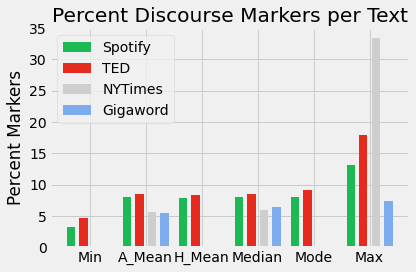

In [11]:
plot_data_barchart("Percent Discourse Markers per Text",
                       compute_y_values_statics(data.spotify_data['dm_words_perc'].dropna(), label_1="Spotify",
                                                data_2=data.ted_data['dm_words_perc'].dropna(), label_2="TED",
                                                data_3=data.ny_data['dm_words_perc'].dropna(), label_3="NYTimes",
                                                data_4=data.gig_data['dm_words_perc'].dropna(), label_4="Gigaword"),
                       ["Min", "A_Mean", "H_Mean", "Median", "Mode", "Max"],
                       "Percent Markers",
                       label_1="Spotify", label_2="TED", label_3="NYTimes", label_4="Gigaword",
                       color_1='#1DB954', color_2='#e62b1e', color_3='#cecece', color_4='#7CACED')

## Number of Discourse Markers per Text

Zeigt, wie viele Diskursmarker minimal, maximal und durchschnittlich in den Texten der Datensätze enthalten sind.

           Min      A_Mean      H_Mean  Median   Mode     Max
Data                                                         
Spotify    7.0  501.965492  240.093303   499.0  486.0  1948.0
TED        5.0  177.202219  118.738563   177.0  190.0   612.0
NYTimes    1.0   43.221044    9.357706    32.0    2.0  1894.0
Gigaword  29.0  210.600000   97.915285   216.0  216.0   352.0


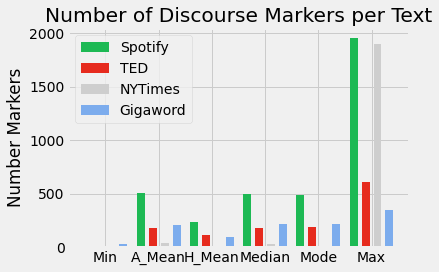

In [12]:
%matplotlib widget
plot_data_barchart("Number of Discourse Markers per Text",
                   compute_y_values_statics(data.spotify_data['dm_count_doc'].dropna(), label_1="Spotify",
                                            data_2 = data.ted_data['dm_count_doc'].dropna(), label_2="TED",
                                            data_3 = data.ny_data['dm_count_doc'].dropna(), label_3 = "NYTimes",
                                            data_4 = data.gig_data['dm_count_doc'].dropna(), label_4="Gigaword"),
                   ["Min", "A_Mean", "H_Mean", "Median", "Mode", "Max"],
                   "Number Markers",
                   label_1="Spotify", label_2="TED", label_3="NYTimes", label_4="Gigaword",
                   color_1='#1DB954', color_2='#e62b1e', color_3='#cecece', color_4='#7CACED')

## Percentage of Sentences that contain at least one Discourse Marker

Shows how many of the sentences of a Text contain at least one Discourse Marker as a percentage

           Min     A_Mean     H_Mean     Median  Mode        Max
Data                                                            
Spotify   36.0  70.768204  69.795867  72.340426  75.0  100.00000
NYTimes    0.0  66.440802   0.000000  71.739130  50.0  100.00000
Gigaword   0.0  61.272642   0.000000  73.511905   0.0   85.56701


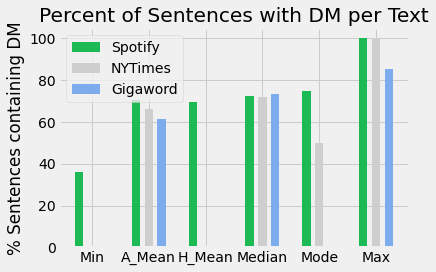

In [13]:
%matplotlib inline
plot_data_barchart("Percent of Sentences with DM per Text",
                   compute_y_values_statics(data.spotify_data['dm_sentences_perc'].dropna(), label_1="Spotify",
                                            data_2=data.ny_data['dm_sentences_perc'].dropna(), label_2="NYTimes",
                                            data_3=data.gig_data['dm_sentences_perc'].dropna(), label_3="Gigaword"),
                   ["Min", "A_Mean", "H_Mean", "Median", "Mode", "Max"],
                   "% Sentences containing DM",
                   label_1="Spotify", label_2="NYTimes", label_3="Gigaword",
                   color_1='#1DB954', color_2='#cecece', color_3='#7CACED')

## Number of Sentences that contain at least one Discourse Marker per Text
Shows how many Sentences of a document contain at least one Discourse Marker (min, mean, max). 

           Min      A_Mean     H_Mean  Median   Mode     Max
Data                                                        
Spotify    3.0  188.232926  98.256204   189.0  192.0   718.0
NYTimes    1.0   20.242202   5.687695    15.0    2.0  1253.0
Gigaword  14.0   91.400000  45.405261    90.0   90.0   164.0


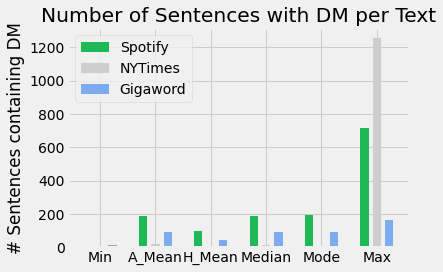

In [14]:
%matplotlib inline
plot_data_barchart("Number of Sentences with DM per Text",
                   compute_y_values_statics(data.spotify_data['dm_sentences'].dropna(), label_1="Spotify",
                                            data_2=data.ny_data['dm_sentences'].dropna(), label_2="NYTimes",
                                            data_3=data.gig_data['dm_sentences'].dropna(), label_3="Gigaword"),
                   ["Min", "A_Mean", "H_Mean", "Median", "Mode", "Max"],
                   "# Sentences containing DM",
                   label_1="Spotify", label_2="NYTimes", label_3="Gigaword",
                   color_1='#1DB954', color_2='#cecece', color_3='#7CACED')

## Number of Discourse Markers per Sentence

Shows how many Discourse Marker the Sentences in the Documents of the Dataset contain at least (min), at average (mean) and at most (max).

          Min    A_Mean    H_Mean  Median  Mode    Max
Data                                                  
Spotify   1.0  2.666725  1.713177     2.0   1.0   39.0
NYTimes   1.0  2.135195  1.571002     2.0   1.0  204.0
Gigaword  1.0  2.304158  1.670675     2.0   1.0   10.0


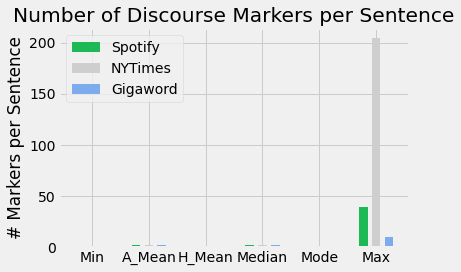

In [15]:
%matplotlib widget
plot_data_barchart("Number of Discourse Markers per Sentence",
                       compute_y_values_statics(
                           get_sentence_values_for_dataset(data.spotify_data['dm_count_sent'].dropna()),
                           label_1="Spotify",
                           data_2=get_sentence_values_for_dataset(data.ny_data['dm_count_sent'].dropna()),
                           label_2="NYTimes",
                           data_3=get_sentence_values_for_dataset(data.gig_data['dm_count_sent'].dropna()),
                           label_3="Gigaword"
                       ),
                       ["Min", "A_Mean", "H_Mean", "Median", "Mode", "Max"],
                       "# Markers per Sentence",
                       label_1="Spotify", label_2="NYTimes", label_3="Gigaword",
                       color_1='#1DB954', color_2='#cecece', color_3='#7CACED')

### Number of DM per Sentence - Histograms

In [16]:
def compute_dm_per_sentence(data, title, color):
    """
    Computes the number of DM per sentence and plots a histogram with a bar for each number of DM
    :param data: dictionary with that contains the numbers of DMs as key and the number of sentences that contain the
    respective number of DM as value
    :param title: the title of the dataset
    :param color: the color of the dataset (Spotify: '#1DB954', NYTimes: '#cecece', Gigaword: '#7CACED')
    :return:
    """
    values = {}

    '''
    Scores are stored in one cell as a String, formated like a python dict
    read the string and evaluate it like a pyton dict
    '''
    for doc in data:
        doc_counts = ast.literal_eval(doc)

        for dm_counter in doc_counts:
            if dm_counter not in values:
                values[dm_counter] = int(doc_counts[dm_counter])
            else:
                values[dm_counter] += int(doc_counts[dm_counter])

    x_values = []
    y_values = []
    for element in sorted(values.items()):
        x_values.append(element[0])
        y_values.append(element[1])

    plt.style.use('fivethirtyeight')

    plt.bar(x_values, y_values, color=color)
    plt.xlabel("Number Marker per Sentence")
    plt.ylabel("Number Sentences")

    plt.title("Number of DM per Sentence - " + title)

    plt.tight_layout()
    plt.show()

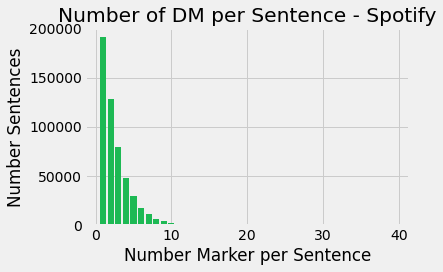

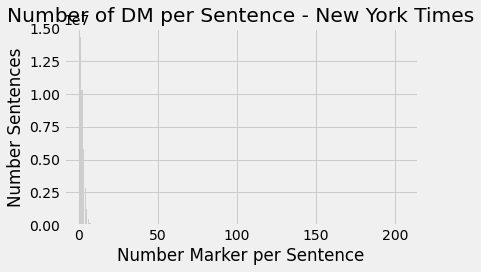

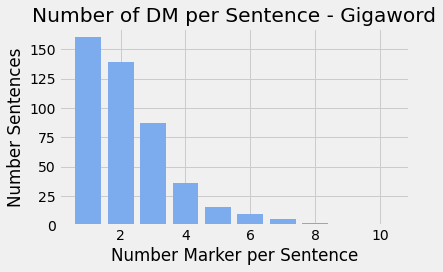

In [17]:
%matplotlib widget
compute_dm_per_sentence(data.spotify_data['dm_count_sent'].dropna(), "Spotify", '#1DB954')
compute_dm_per_sentence(data.ny_data['dm_count_sent'].dropna(), "New York Times", '#cecece')
compute_dm_per_sentence(data.gig_data['dm_count_sent'].dropna(), "Gigaword", '#7CACED')

## Positions of Discourse Markers in the Sentences
---

In [18]:
def percentage(part, whole):
    return (float(part) * 100) / (float(whole))


def compute_percentages(values, data):
    """
    Computes the percentages for an array of 3 values
    :param values: the values to compute the percentage of
    :param data:
    :return: list of the three computed values
    """
    whole = sum(values)
    return [percentage(sum(data[0]), whole), percentage(sum(data[1]), whole),
                  percentage(sum(data[2]), whole)]

In [19]:
def compute_yvalues_positions(data_1, label_1=None, data_2=None, label_2=None, data_3=None, label_3=None, data_4=None, label_4=None, perc=False):
    """
    Computes the total number or percentage of DM at the beginning, middle or end of a sentence
    data_x = [dm_pos_sent_begin, dm_pos_sent_middle, dm_pos_sent_end]
    :return:
    """

    y_values_1 = [sum(data_1[0]), sum(data_1[1]), sum(data_1[2])]
    if perc:
        y_values_1 = compute_percentages(y_values_1, data_1)
        
    y_values_2 = None
    y_values_3 = None
    y_values_4 = None
    
    values = {}
    columns = ['Begin', 'Middle', 'End']
    for key, value in zip(columns, y_values_1):
        values[key] = [value]
    values['Data'] = [label_1]

    if data_2 is not None:
        y_values_2 = [sum(data_2[0]), sum(data_2[1]), sum(data_2[2])]
        if perc:
            y_values_2 = compute_percentages(y_values_2, data_2)
        values = add_values(values, columns, y_values_2, label_2)

    if data_3 is not None:
        y_values_3 = [sum(data_3[0]), sum(data_3[1]), sum(data_3[2])]
        if perc:
            y_values_3 = compute_percentages(y_values_3, data_3)
        values = add_values(values, columns, y_values_3, label_3)

    if data_4 is not None:
        y_values_4 = [sum(data_4[0]), sum(data_4[1]), sum(data_4[2])]
        if perc:
            y_values_4 = compute_percentages(y_values_4, data_4)
        values = add_values(values, columns, y_values_4, label_4)

    print_dataframe(values, 'Data')
    
    return [y_values_1, y_values_2, y_values_3, y_values_4]

### Number of Discourse Markers at a certain Position in a Sentence

Shows how many Discourse Markers the sentences in the documents of a Dataset contain at the beginning, in the middle and at the end

               Begin      Middle        End
Data                                       
Spotify     264716.0   1008089.0   123663.0
NYTimes   14211500.0  54269088.0  6822356.0
Gigaword       144.0       825.0       84.0


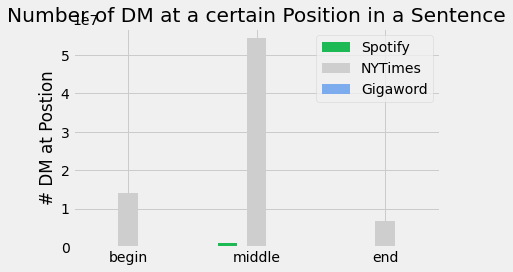

In [20]:
%matplotlib widget
plot_data_barchart("Number of DM at a certain Position in a Sentence",
                   compute_yvalues_positions(
                       [data.spotify_data['dm_pos_sent_begin'].dropna(), data.spotify_data['dm_pos_sent_middle'].dropna(),
                        data.spotify_data['dm_pos_sent_end'].dropna()], label_1="Spotify",
                       data_2=[data.ny_data['dm_pos_sent_begin'].dropna(), data.ny_data['dm_pos_sent_middle'].dropna(),
                               data.ny_data['dm_pos_sent_end'].dropna()], label_2="NYTimes",
                       data_3=[data.gig_data['dm_pos_sent_begin'].dropna(), data.gig_data['dm_pos_sent_middle'].dropna(),
                               data.gig_data['dm_pos_sent_end'].dropna()], label_3="Gigaword"
                   ),
                   ["begin", "middle", "end"],
                   "# DM at Postion",
                   label_1="Spotify", label_2="NYTimes", label_3="Gigaword",
                   color_1='#1DB954', color_2='#cecece', color_3='#7CACED')

### Percentage of Discourse Markers at a certain Position in a Sentence

Shows where the Discourse Markers are positioned in a sentence as a percentage (i.e. 'x% of the Discourse Markers of the Documents in Dataset A are positioned at the beginning of a sentence, y % in the middle and z% at the end of a sentence')

              Begin     Middle       End
Data                                    
Spotify   18.956109  72.188478  8.855412
NYTimes   18.872436  72.067684  9.059880
Gigaword  13.675214  78.347578  7.977208


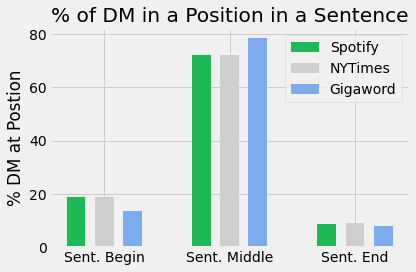

In [21]:
%matplotlib inline
plot_data_barchart("% of DM in a Position in a Sentence",
                   compute_yvalues_positions(
                       [data.spotify_data['dm_pos_sent_begin'].dropna(), data.spotify_data['dm_pos_sent_middle'].dropna(),
                        data.spotify_data['dm_pos_sent_end'].dropna()], label_1="Spotify",
                       data_2=[data.ny_data['dm_pos_sent_begin'].dropna(), data.ny_data['dm_pos_sent_middle'].dropna(),
                               data.ny_data['dm_pos_sent_end'].dropna()], label_2="NYTimes",
                       data_3=[data.gig_data['dm_pos_sent_begin'].dropna(), data.gig_data['dm_pos_sent_middle'].dropna(),
                               data.gig_data['dm_pos_sent_end'].dropna()], label_3="Gigaword",
                       perc=True
                   ),
                   ["Sent. Begin", "Sent. Middle", "Sent. End"],
                   "% DM at Postion",
                   label_1="Spotify", label_2="NYTimes", label_3="Gigaword",
                   color_1='#1DB954', color_2='#cecece', color_3='#7CACED')

Piecharts that show how many Discourse Markers are positioned in the beginning, the middle and the end of the sentences in the datasets.

In [22]:
def plot_dm_positions_sent_piechart(title, data, labels, colors):
    """
    Prepares the Data for Piecharts:
    One for each Dataset with slices=[counter_begin, counter_middle, counder_end]
    and one for each Position (Begin, Middle, End) with slices for each dataset
    :param: data array that contains the datasets
    :param: array of labels for the datasets
    :param: array of colors for the datasets
    :return:
    """
    set_labels = ["Begin", "Middle", "End"]
    # greens, greys, blues
    set_colors = [['#61D836', '#007B76', '#1DB100'], ['#f2f2f2', '#cecece', '#aba7a7'],
                  ['#7CACED', '#2657AF', '#6291E7']]
    begin_slices = []
    middle_slices = []
    end_slices = []
    for dataset, label, color in zip(data, labels, set_colors):
        begin_slices.append(sum(dataset[0]))
        middle_slices.append(sum(dataset[1]))
        end_slices.append(sum(dataset[2]))
        set_slices = [sum(dataset[0]), sum(dataset[1]), sum(dataset[2])]
        set_title = label
        draw_piechart(set_title, set_slices, set_labels, color, 0)

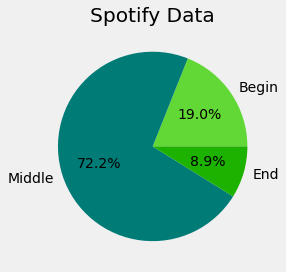

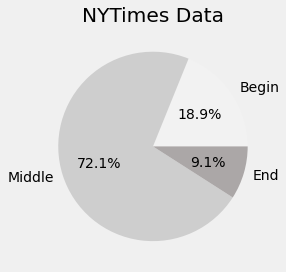

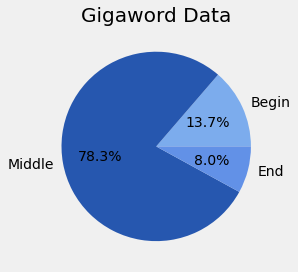

In [23]:
plot_dm_positions_sent_piechart("Number of DM in a Sentence at Position:",
                                    [[data.spotify_data['dm_pos_sent_begin'].dropna(),
                                      data.spotify_data['dm_pos_sent_middle'].dropna(),
                                      data.spotify_data['dm_pos_sent_end'].dropna()],
                                     [data.ny_data['dm_pos_sent_begin'].dropna(), data.ny_data['dm_pos_sent_middle'].dropna(),
                                      data.ny_data['dm_pos_sent_end'].dropna()],
                                     [data.gig_data['dm_pos_sent_begin'].dropna(), data.gig_data['dm_pos_sent_middle'].dropna(),
                                      data.gig_data['dm_pos_sent_end'].dropna()]
                                     ],
                                    ["Spotify Data", "NYTimes Data", "Gigaword Data"],
                                    ['#1DB954', '#cecece', '#7CACED'])

## Positions of Discourse Markers the Documents
---

Shows how many Discourse Markers are positioned in the beginning, the middle and the end of a document

               Begin      Middle         End
Data                                        
Spotify     200845.0    976983.0    218640.0
TED          52444.0    245411.0     53537.0
NYTimes   10632845.0  53590096.0  11080003.0
Gigaword       169.0       753.0       131.0


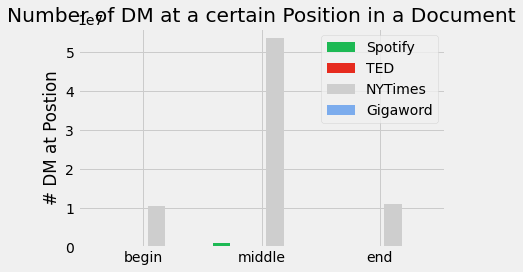

In [24]:
%matplotlib widget
plot_data_barchart("Number of DM at a certain Position in a Document",
                   compute_yvalues_positions(
                       [data.spotify_data['dm_pos_doc_begin'].dropna(), data.spotify_data['dm_pos_doc_middle'].dropna(),
                        data.spotify_data['dm_pos_doc_end'].dropna()], label_1="Spotify",
                       data_2=[data.ted_data['dm_pos_doc_begin'].dropna(), data.ted_data['dm_pos_doc_middle'].dropna(),
                               data.ted_data['dm_pos_doc_end'].dropna()], label_2="TED",
                       data_3=[data.ny_data['dm_pos_doc_begin'].dropna(), data.ny_data['dm_pos_doc_middle'].dropna(),
                               data.ny_data['dm_pos_doc_end'].dropna()], label_3="NYTimes",
                       data_4=[data.gig_data['dm_pos_doc_begin'].dropna(), data.gig_data['dm_pos_doc_middle'].dropna(),
                               data.gig_data['dm_pos_doc_end'].dropna()], label_4="Gigaword"
                   ),
                   ["begin", "middle", "end"],
                   "# DM at Postion",
                   label_1="Spotify", label_2="TED", label_3="NYTimes", label_4="Gigaword",
                   color_1='#1DB954', color_2='#e62b1e',color_3='#cecece', color_4='#7CACED')

              Begin     Middle        End
Data                                     
Spotify   14.382356  69.961002  15.656642
TED       14.924643  69.839666  15.235691
NYTimes   14.120092  71.166004  14.713904
Gigaword  16.049383  71.509972  12.440646


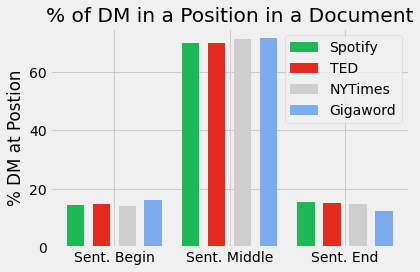

In [25]:
%matplotlib inline
plot_data_barchart("% of DM in a Position in a Document",
                   compute_yvalues_positions(
                       [data.spotify_data['dm_pos_doc_begin'].dropna(), data.spotify_data['dm_pos_doc_middle'].dropna(),
                        data.spotify_data['dm_pos_doc_end'].dropna()], label_1="Spotify",
                       data_2=[data.ted_data['dm_pos_doc_begin'].dropna(), data.ted_data['dm_pos_doc_middle'].dropna(),
                               data.ted_data['dm_pos_doc_end'].dropna()], label_2="TED",
                       data_3=[data.ny_data['dm_pos_doc_begin'].dropna(), data.ny_data['dm_pos_doc_middle'].dropna(),
                               data.ny_data['dm_pos_doc_end'].dropna()], label_3="NYTimes",
                       data_4=[data.gig_data['dm_pos_doc_begin'].dropna(), data.gig_data['dm_pos_doc_middle'].dropna(),
                               data.gig_data['dm_pos_doc_end'].dropna()], label_4="Gigaword",
                       perc=True
                   ),
                   ["Sent. Begin", "Sent. Middle", "Sent. End"],
                   "% DM at Postion",
                   label_1="Spotify", label_2="TED", label_3="NYTimes", label_4="Gigaword",
                   color_1='#1DB954', color_2='#e62b1e',color_3='#cecece', color_4='#7CACED')

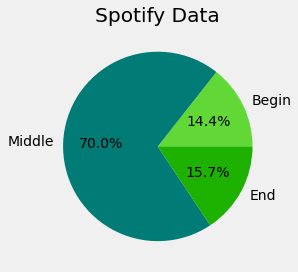

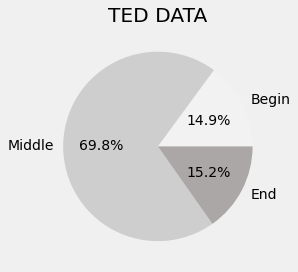

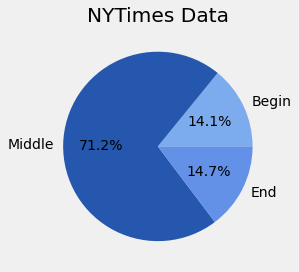

In [26]:
plot_dm_positions_sent_piechart("Number of DM in a Document at Position:",
                                    [[data.spotify_data['dm_pos_doc_begin'].dropna(),
                                      data.spotify_data['dm_pos_doc_middle'].dropna(),
                                      data.spotify_data['dm_pos_doc_end'].dropna()],
                                     [data.ted_data['dm_pos_doc_begin'].dropna(), data.ted_data['dm_pos_doc_middle'].dropna(),
                                      data.ted_data['dm_pos_doc_end'].dropna()],
                                     [data.ny_data['dm_pos_doc_begin'].dropna(), data.ny_data['dm_pos_doc_middle'].dropna(),
                                      data.ny_data['dm_pos_doc_end'].dropna()],
                                     [data.gig_data['dm_pos_doc_begin'].dropna(), data.gig_data['dm_pos_doc_middle'].dropna(),
                                      data.gig_data['dm_pos_doc_end'].dropna()]
                                     ],
                                    ["Spotify Data", "TED DATA", "NYTimes Data", "Gigaword Data"],
                                    ['#1DB954', '#e62b1e', '#cecece', '#7CACED'])

## Markerhäufigkeiten - generell
Shows the number of occurrences of a Discourse Marker in a dataset

### Class DatasetMarkers

In [27]:
class DatasetMarkers:

    def __init__(self, data):
        self.total_docs = data['stats']['total_docs']
        self.total_markers = data['stats']['total_markers']
        self.different_markers = data['stats']['different_markers']
        self.total_sb = data['stats']['total_sb']
        self.total_sm = data['stats']['total_sm']
        self.total_se = data['stats']['total_se']
        self.total_db = data['stats']['total_db']
        self.total_dm = data['stats']['total_dm']
        self.total_de = data['stats']['total_de']
        self.marker_dict = data['marker']

    def get_total_values(self):
        """
        Creates a dictionary with the markers as keys and their total number of occurrence in this dataset as value
        :return:
        """
        markers = {}
        for marker in self.marker_dict:
            markers[marker] = self.marker_dict[marker]['total']

        return markers

    def get_total_percents(self):
        """
        Creates a dictionary with the markers as keys
        and their percentage-share in all the markers in this dataset as value
        :return:
        """
        percents = {}
        for marker in self.marker_dict:
            percents[marker] = (self.marker_dict[marker]['total'] * 100) / self.total_markers

        return percents

    def get_total_statistics(self):
        """
        Creates a dictionary with the markers as keys and their average number of occurences
        (a_mean, h_mean, median, mode) over all the documents in this dataset as value-dict
        :return:
        """
        statistics = {}

        for marker in self.marker_dict:
            statistics[marker] = {}
            statistics[marker]['a_mean'] = self.marker_dict['total'] / self.total_docs
            statistics[marker]['h_mean'] = self.total_docs / self.marker_dict['inverse_sum_total']
            statistics[marker]['median'] = self.marker_dict[marker]['median_total']
            statistics[marker]['mode'] = self.marker_dict[marker]['mode_total'][0]

        return statistics

    def get_markers(self):
        """
        :return: a list of all the markers in this dataset
        """
        markers = []
        for marker in self.marker_dict:
            markers.append(marker)
        return markers

In [34]:
def list_all_markers(data1, data2=None, data3=None, data4=None):
    markers_1 = DatasetMarkers(data1)
    markers = markers_1.get_markers()

    if data2 is not None:
        markers_2 = DatasetMarkers(data2)
        for marker in markers_2.get_markers():
            if marker not in markers:
                markers.append(marker)

    if data3 is not None:
        markers_3 = DatasetMarkers(data3)
        for marker in markers_3.get_markers():
            if marker not in markers:
                markers.append(marker)

    if data4 is not None:
        markers_4 = DatasetMarkers(data4)
        for marker in markers_4.get_markers():
            if marker not in markers:
                markers.append(marker)

    return markers

In [35]:
def compute_marker_occurences(data1, data2=None, data3=None, data4=None):
    markers = list_all_markers(data1, data2, data3, data4)
    markers_1 = DatasetMarkers(data1).get_total_values()
    y_values_1 = []

    markers_2 = []
    y_values_2 = None
    markers_3 = []
    y_values_3 = None
    markers_4 = []
    y_values_4 = None

    if data2 is not None:
        markers_2 = DatasetMarkers(data2).get_total_values()
        y_values_2 = []

    if data3 is not None:
        markers_3 = DatasetMarkers(data3).get_total_values()
        y_values_3 = []

    if data4 is not None:
        markers_4 = DatasetMarkers(data4).get_total_values()
        y_values_4 = []

    for marker in markers:
        if marker in markers_1:
            y_values_1.append(markers_1[marker])
        else:
            y_values_1.append(0)
        if data2 is not None:
            if marker in markers_2:
                y_values_2.append(markers_2[marker])
            else:
                y_values_2.append(0)
        if data3 is not None:
            if marker in markers_3:
                y_values_3.append(markers_3[marker])
            else:
                y_values_3.append(0)
        if data4 is not None:
            if marker in markers_4:
                y_values_4.append(markers_4[marker])
            else:
                y_values_4.append(0)

    return [markers, y_values_1, y_values_2, y_values_3, y_values_4]


In [38]:
marker_occurences = compute_marker_occurences(data.spotify_marker, data.ted_marker,
                                               data.ny_marker, data.gig_marker)
%matplotlib widget
plot_horizontal_barchart("Discourse Marker Occurrences",
                         marker_occurences[0],
                         [marker_occurences[1], marker_occurences[2], marker_occurences[3], marker_occurences[4]],
                         "Number of Occurrences",
                         label_1="Spotify", label_2="TED", label_3="NYTimes", label_4="Gigaword",
                         color_1='#1DB954', color_2='#e62b1e', color_3='k', color_4='#7CACED',
                         subplot=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [41]:
def compute_marker_percentages(data1, data2=None, data3=None, data4=None):
    markers = list_all_markers(data1, data2, data3, data4)
    markers_1 = DatasetMarkers(data1).get_total_percents()
    y_values_1 = []

    markers_2 = []
    y_values_2 = None
    markers_3 = []
    y_values_3 = None
    markers_4 = []
    y_values_4 = None

    if data2 is not None:
        markers_2 = DatasetMarkers(data2).get_total_percents()
        y_values_2 = []

    if data3 is not None:
        markers_3 = DatasetMarkers(data3).get_total_percents()
        y_values_3 = []

    if data4 is not None:
        markers_4 = DatasetMarkers(data4).get_total_percents()
        y_values_4 = []

    for marker in markers:
        if marker in markers_1:
            y_values_1.append(markers_1[marker])
        else:
            y_values_1.append(0)
        if marker in markers_2:
            y_values_2.append(markers_2[marker])
        else:
            y_values_2.append(0)
        if marker in markers_3:
            y_values_3.append(markers_3[marker])
        else:
            y_values_3.append(0)
        if marker in markers_4:
            y_values_4.append(markers_4[marker])
        else:
            y_values_4.append(0)

    return [markers, y_values_1, y_values_2, y_values_3, y_values_4]

In [42]:
marker_percents = compute_marker_percentages(data.spotify_marker, data.ted_marker,
                                                 data.ny_marker, data.gig_marker)
%matplotlib widget
plot_horizontal_barchart("Discourse Marker Occurrences",
                         marker_percents[0],
                         [marker_percents[1], marker_percents[2], marker_percents[3], marker_percents[4]],
                         "Percentual Occurence in Dataset",
                         label_1="Spotify", label_2="TED", label_3="NYTimes", label_4="Gigaword",
                         color_1='#1DB954', color_2='#e62b1e', color_3='k', color_4='#7CACED',
                         subplot=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …